## 1 Question Answers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from scipy.signal import stft
Fs = 125 #Sampling Frequency
data_pd = pd.read_csv('HW5_anesthesia_record_125Hz.csv')
data = data_pd.to_numpy()
data = data[:,0]
data.shape

(374999,)

### 1a,b

(126,) (3001,) (126, 3001)


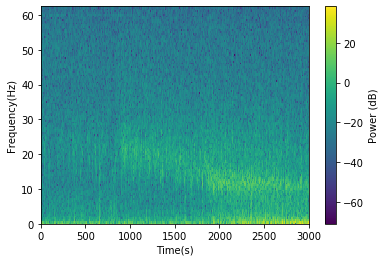

In [3]:
f,t,Zxx = stft(data,fs=Fs,nperseg=2*Fs) 
print(f.shape, t.shape, Zxx.shape)
P = np.abs(Zxx) **2 

plt.pcolor(t,f,10*np.log10(P))
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.colorbar(label = 'Power (dB)')

### 1c 

We always observe a peak power in the lower frequency compenents at all time indicating a constant presence of certain frequency events. However before the induction of anesthesia there are no other significant frequencies present other than these low frequency oscillations in the spectogram. But after the induction of the drug we can see a raise in the power of the frequencies present in the band of 20~30 Hz. As time passes by the strength shifts gradually to lower frequencies in the range of 10-20 Hz. In general we can observe certain that it increases brain oscillation in the freqency band ranging from 10-30 Hz.

### 1d 
The frequency resolution depends on nperserg that is time duration of each segment used for computing sftf in this case it 2s hence the frequency resolution we get is 1/2 Hz.

### 1e
To modify the frequency resolution we need to change the npserg. In order to have a resolution of around 0.1Hz we need each of the time segments to last for 1/0.1 s = 10s. This is shown below in the example

(626,) (601,) (626, 601)


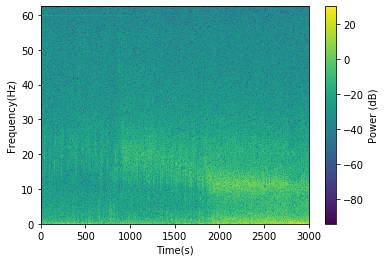

In [4]:
f,t,Zxx = stft(data,fs=Fs,nperseg=10*Fs)
print(f.shape, t.shape, Zxx.shape)
P = np.abs(Zxx) **2

plt.pcolor(t,f,10*np.log10(P))
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.colorbar(label = 'Power (dB)')

## 2 Question Answers
### 2a Spike Train

In [5]:
Fs = 1500 #Sampling Frequency
t = np.arange(0,15,1/Fs) 
outcome = [0,1]
spike = np.random.choice(outcome,len(t),p=[1-0.0005,0.0005])

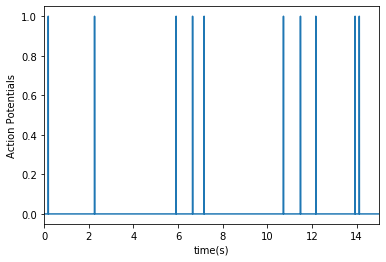

In [6]:
plt.plot(t,spike)
plt.xlabel('time(s)')
plt.ylabel('Action Potentials')
plt.xlim([0,15])
plt.show()

### 2b 

In [7]:
tau1, tau2 = 10/1000, 200/1000
h = (1-np.exp(-t/tau1)) * np.exp(-t/tau2)

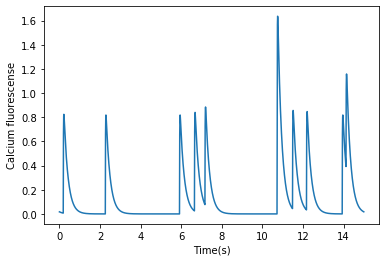

In [8]:
output = np.fft.ifft(np.fft.fft(spike)*np.fft.fft(h))
plt.plot(t,np.real(output))
plt.xlabel('Time(s)')
plt.ylabel('Calcium fluorescense')
plt.show()

### 2c The output with Noise addition 

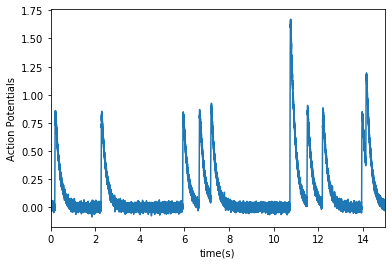

In [9]:
output_with_noise = output + np.random.normal(0, 0.02, len(spike))
plt.plot(t,np.real(output_with_noise))
plt.xlabel('time(s)')
plt.ylabel('Action Potentials')
plt.xlim([0,15])
plt.show()

### 2d

Text(0, 0.5, 'Magnitude Response(dB)')

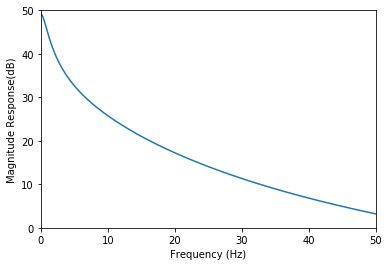

In [10]:
H = np.fft.fft(h)
freq_bins = np.fft.fftfreq(len(H),1/Fs)
plt.plot(freq_bins,10*np.log10(np.abs(H**2)))
plt.xlim([0,50])
plt.ylim([0,50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Response(dB)')

This is a low pass filter as you can observe that the higher fequency components are attenuated. However note that as the frequency approaches higher values the response is tending to 0 dB meaning that the signal is uneffected. So this filter actually boosts the lower frequency and let's go the higher frequency components rather than behaving like a conventional low pass filter that attenuates the higher and letting lower frequency pass just like a 'low-pass' filter should do.

### 2f

Text(0, 0.5, 'Magnitude Response(dB)')

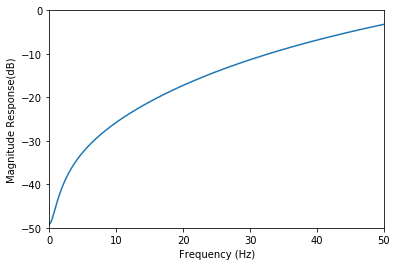

In [11]:
H = np.fft.fft(h)
freq_bins = np.fft.fftfreq(len(H),1/Fs)
plt.plot(freq_bins,10*np.log10(np.abs((1/H)**2)))
plt.xlim([0,50])
plt.ylim([-50,0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Response(dB)')

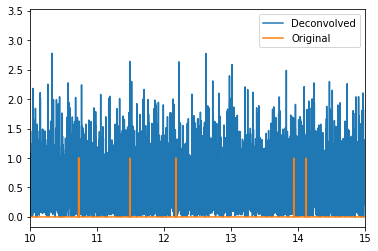

In [12]:
x = np.fft.ifft(np.fft.fft(output_with_noise) * 1/H)
plt.plot(t,np.abs(np.real(x)))
plt.plot(t,spike)
# plt.ylim([-5,5])
plt.xlim([10,15])
plt.legend(['Deconvolved','Original'])

### 2g

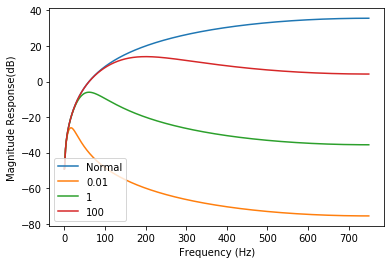

In [13]:
H = np.fft.fft(h)
freq_bins = np.fft.fftfreq(len(H),1/Fs)
pos_freq_size = freq_bins.shape[0] // 2
H_square = np.abs(H ** 2)
freq_bins = freq_bins[:pos_freq_size]
s = [0.01,1,100]

D_denominator = H_square
D_numerator = H
D = D_numerator / D_denominator
D = D[:pos_freq_size]
plt.plot(freq_bins,10*np.log10(np.abs((D)**2)))


D_denominator = H_square + 1/s[0]
D_numerator = H
D = D_numerator / D_denominator
D = D[:pos_freq_size]
plt.plot(freq_bins,10*np.log10(np.abs((D)**2)))

D_denominator = H_square + 1/s[1]
D_numerator = H
D = D_numerator / D_denominator
D = D[:pos_freq_size]
plt.plot(freq_bins,10*np.log10(np.abs((D)**2)))

D_denominator = H_square + 1/s[2]
D_numerator = H
D = D_numerator / D_denominator
D = D[:pos_freq_size]
plt.plot(freq_bins,10*np.log10(np.abs((D)**2)))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Response(dB)')
plt.legend(['Normal','0.01','1','100'])

As s gets smaller the higher freqency components are suppressed stronger. 

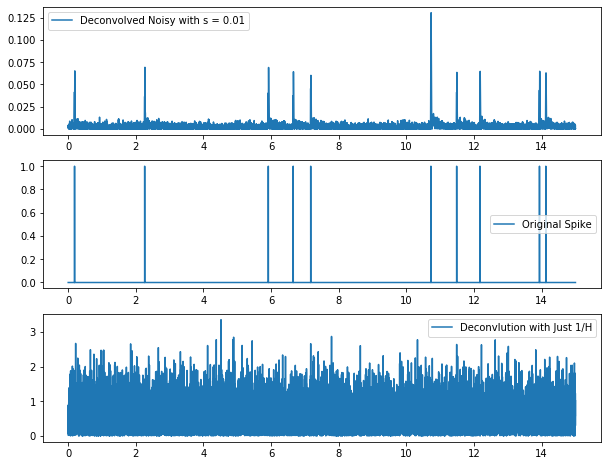

In [14]:
D_denominator = H_square + 1/s[1]
D_numerator = H
D = D_numerator / D_denominator
x = np.fft.ifft(np.fft.fft(output_with_noise) * D)
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(t,np.real(np.abs(x)))
plt.legend(['Deconvolved Noisy with s = 0.01'])


plt.subplot(312)
plt.plot(t,spike)
plt.legend(['Original Spike'])

x = np.fft.ifft(np.fft.fft(output_with_noise) * 1/H)
plt.subplot(313)
plt.plot(t,np.abs(np.real(x)))
plt.legend(['Deconvlution with Just 1/H'])

The reconstruction is much closer to the original signal. As all the noise has been removed by the wiener filter.